In [1]:
import networkx as nx
import igraph as ig
from sznajd.sznajd import Sznajd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

MONTE_CARLO_ITERATIONS = 2

NEGATIVE = -1
POSITIVE = 1

In [2]:
network_name = 'watts-strogatz'
network_path = f'data/nets/{network_name}/{network_name}_0.edgelist'
model_historic = []
result_dict = {}
model = Sznajd()
initialization_dict = {
    'random': model.random_network_initialization, 
    'direct': model.direct_initialization,
    'inverse': model.inverse_initialization
}
model.set_graph(nx.read_edgelist(network_path))
for initialization in initialization_dict:
    consensus_time_list = []
    opinion_change_frequency_list = []
    for i in tqdm(range(MONTE_CARLO_ITERATIONS), leave=False):
        model.reset_model()
        initialization_dict[initialization](0.8)
        consensus_time, opinion_change_frequency = model.run_model()
        consensus_time_list.append(consensus_time)
        opinion_change_frequency_list.append(opinion_change_frequency)
        model_historic.append(model.time_series)
    print(opinion_change_frequency_list, consensus_time_list)
    result_dict[initialization] = {
        'consensus_time': float(np.mean(consensus_time_list)),
        'opinion_change_frequency': float(np.mean(opinion_change_frequency_list))
    }

[499, 462] [1000, 1000]


[163, 146] [1000, 1000]


[189, 152] [1000, 1000]


Text(0.5, 1.0, 'Snzajd model evolution')

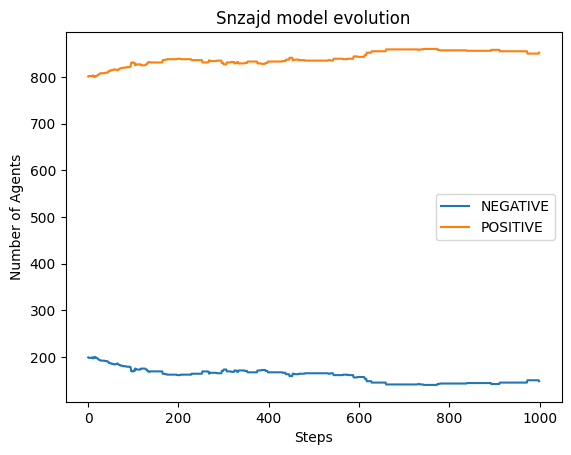

In [3]:
time_series = [[x[NEGATIVE], x[POSITIVE]] for x in model_historic[4]]
plt.plot(time_series)
plt.xlabel('Steps')
plt.ylabel('Number of Agents')
plt.legend(['NEGATIVE', 'POSITIVE'])
plt.title('Snzajd model evolution')

In [17]:
model.get_nodes_sorted_by_degree()

[('15', 9),
 ('36', 9),
 ('46', 9),
 ('117', 9),
 ('87', 9),
 ('108', 9),
 ('122', 9),
 ('138', 9),
 ('141', 9),
 ('169', 9),
 ('179', 9),
 ('190', 9),
 ('203', 9),
 ('209', 9),
 ('244', 9),
 ('248', 9),
 ('287', 9),
 ('399', 9),
 ('414', 9),
 ('415', 9),
 ('418', 9),
 ('419', 9),
 ('420', 9),
 ('422', 9),
 ('446', 9),
 ('468', 9),
 ('488', 9),
 ('505', 9),
 ('506', 9),
 ('577', 9),
 ('587', 9),
 ('597', 9),
 ('631', 9),
 ('686', 9),
 ('719', 9),
 ('752', 9),
 ('759', 9),
 ('799', 9),
 ('829', 9),
 ('838', 9),
 ('876', 9),
 ('891', 9),
 ('916', 9),
 ('920', 9),
 ('925', 9),
 ('940', 9),
 ('941', 9),
 ('979', 9),
 ('987', 9),
 ('1', 10),
 ('999', 10),
 ('2', 10),
 ('998', 10),
 ('3', 10),
 ('997', 10),
 ('4', 10),
 ('996', 10),
 ('5', 10),
 ('995', 10),
 ('985', 10),
 ('6', 10),
 ('7', 10),
 ('8', 10),
 ('9', 10),
 ('10', 10),
 ('11', 10),
 ('12', 10),
 ('13', 10),
 ('14', 10),
 ('16', 10),
 ('17', 10),
 ('18', 10),
 ('19', 10),
 ('20', 10),
 ('21', 10),
 ('22', 10),
 ('23', 10),
 ('24'

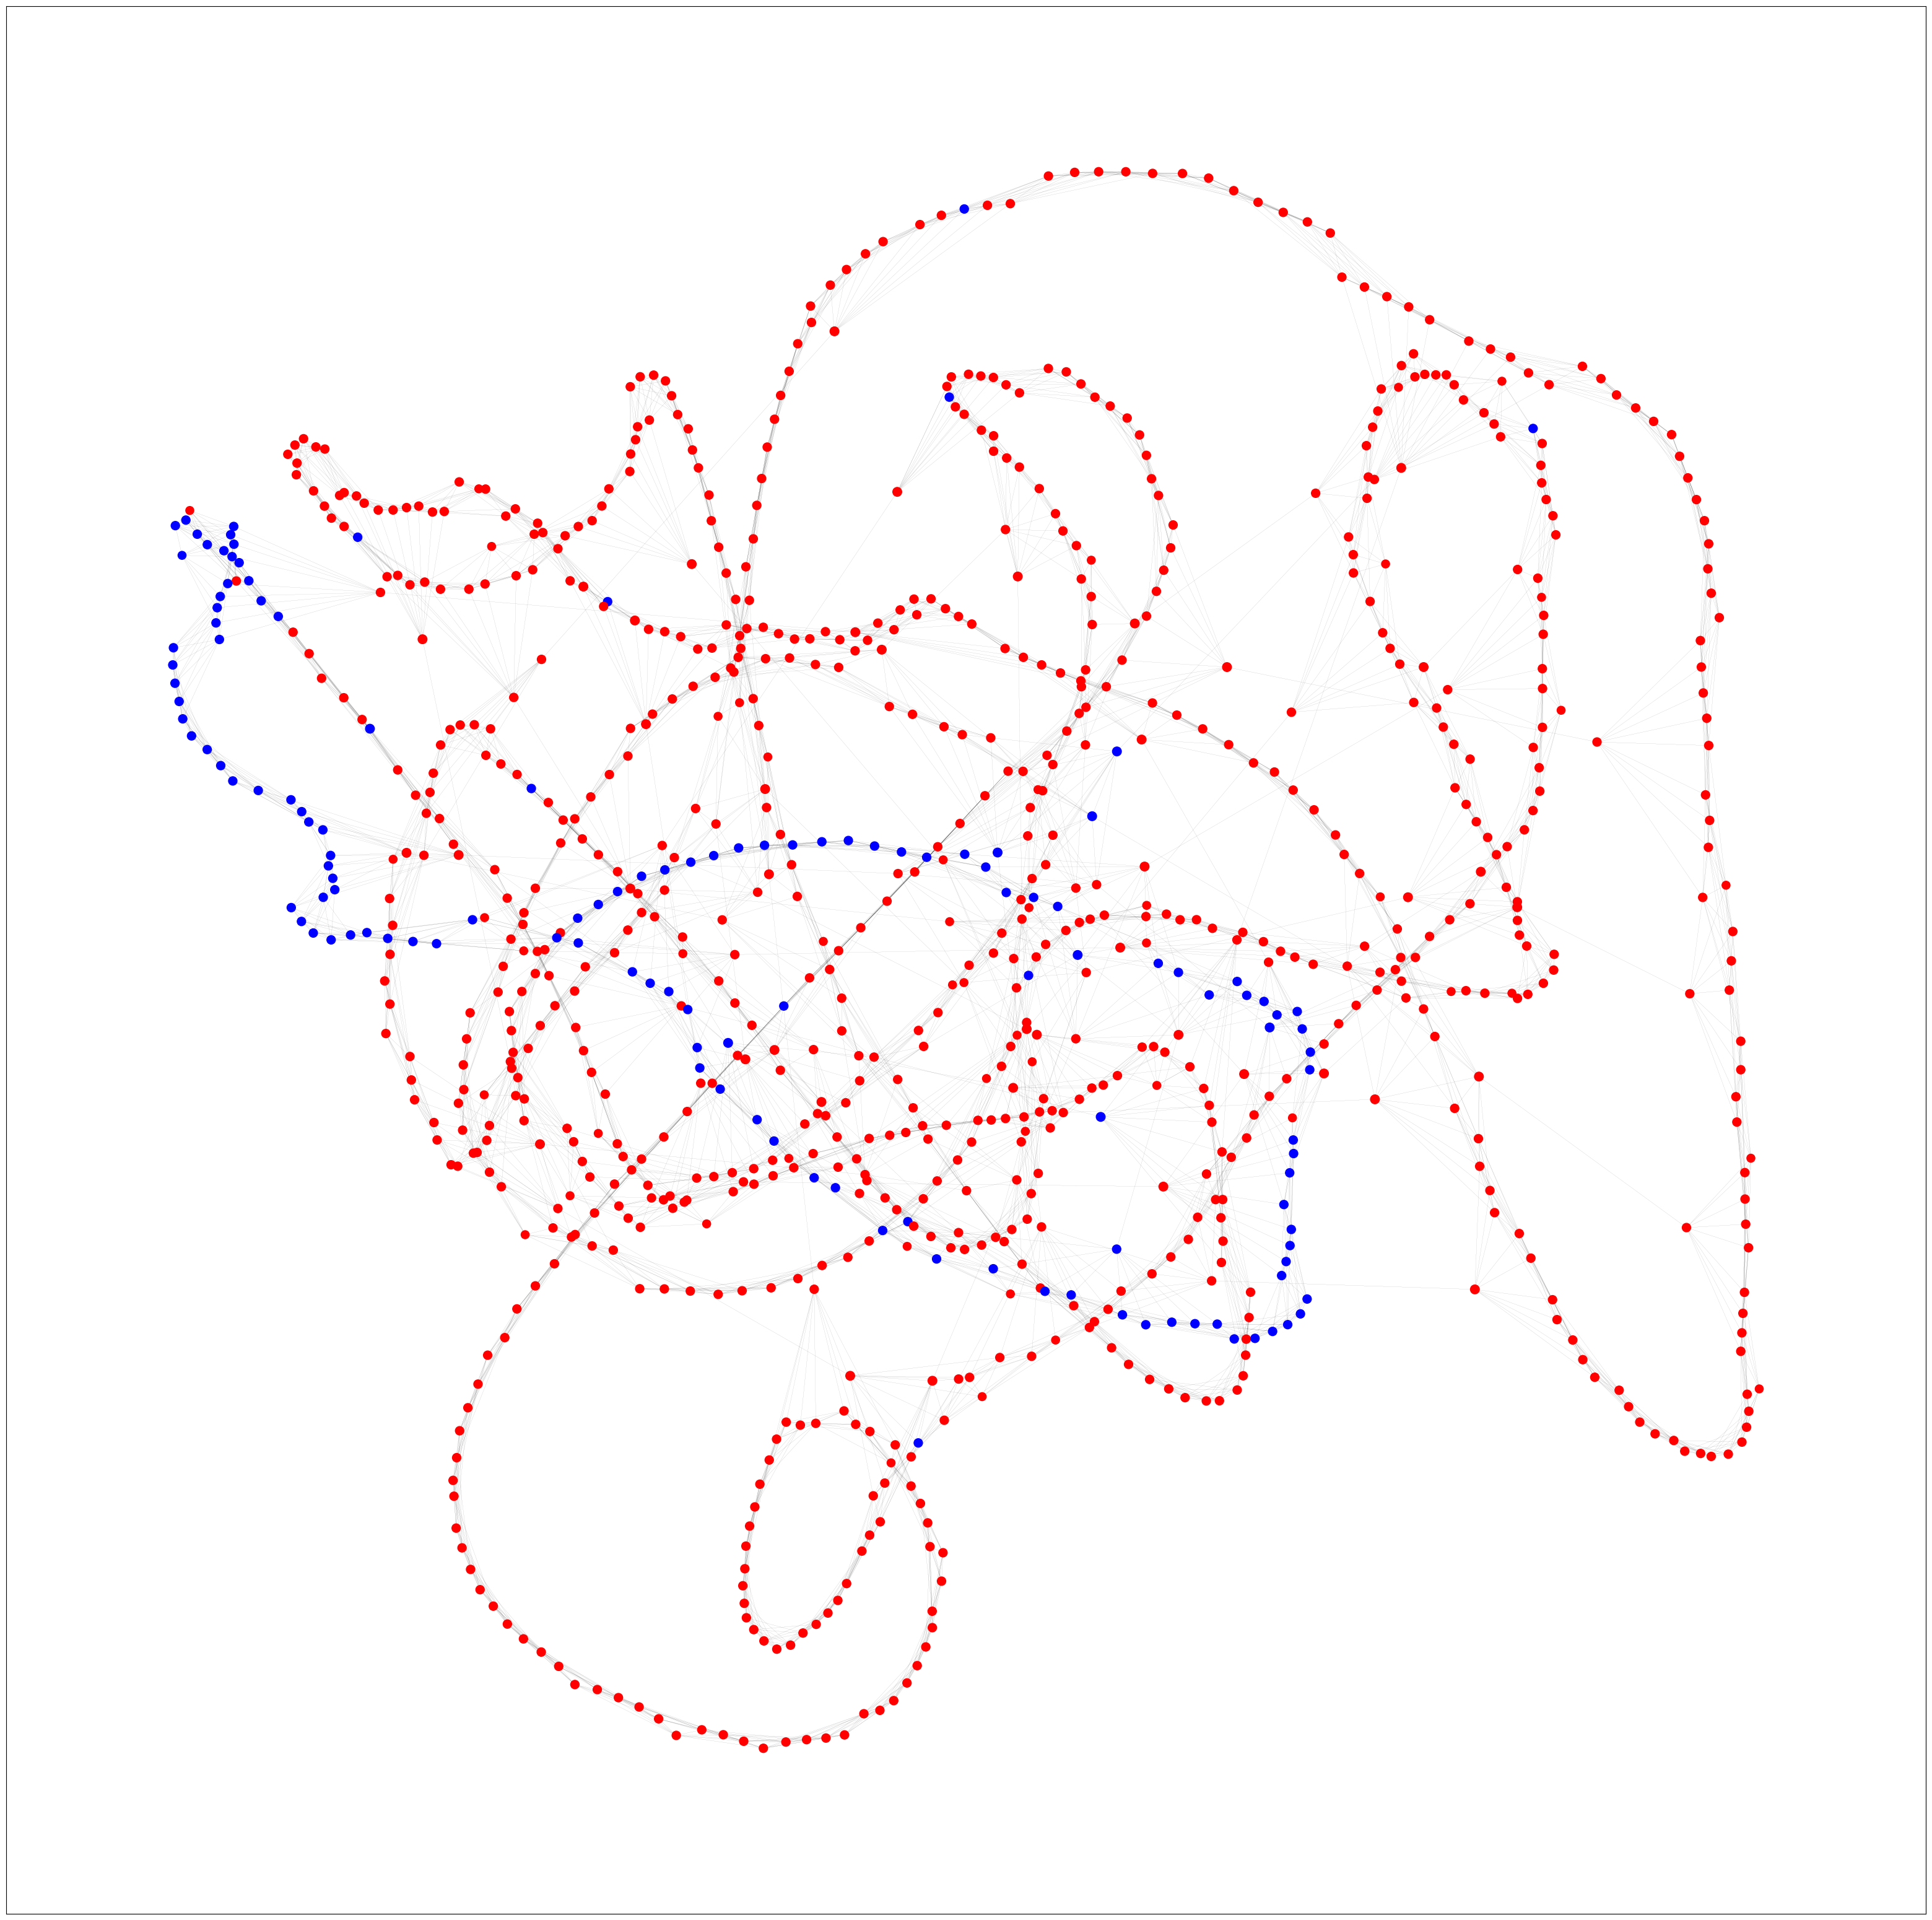

In [21]:
fig = plt.figure(figsize=(40, 40)) 
pos = nx.spring_layout(model.graph, seed=0)
node_by_degree = model.get_nodes_sorted_by_degree()
colors = [node[1] for node in list(model.get_nodes())]

nodes = nx.draw_networkx_nodes(
    model.graph,
    pos=pos,
    # node_size=100,
    node_color=colors,
    cmap='bwr',
    nodelist = [v[0] for v in node_by_degree],
    node_size = [v[1] * 10 for v in node_by_degree]
)

nx.draw_networkx_edges(
    model.graph,
    pos=pos,
    width=0.05,
)
plt.show()